These code are modified from course material ‘Jupyter Notebook - multilayer perceptron' and 'hw4'

In [1]:
import sklearn
import sklearn.tree
import numpy as np
from io import StringIO
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from matplotlib import pyplot as plt
import time

In [2]:
df_digits = pd.read_csv('digits.csv')
df_digits.head()

,label,0x0,0x1,0x2,0x3,0x4,0x5,0x6,0x7,0x8,...,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13
0,7,0,0,0,0,0,0,0,0,0,...,0,0,41,88,3,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
### select all rows except label column
X_matrix = df_digits.drop("label", axis=1).values
### select label column
y = df_digits["label"].values

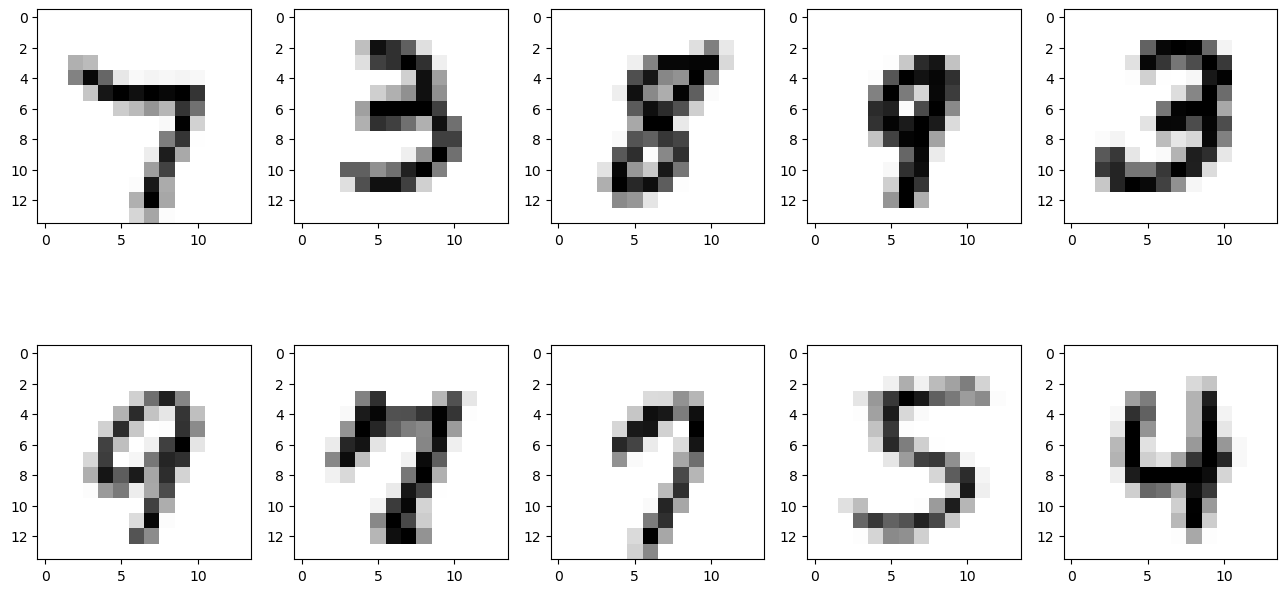

In [4]:
fig = plt.figure(figsize=(16,8))
for i in range(10):
    for j in range(y.shape[0]):
        if y[j] == i:
            ax = fig.add_subplot(2, 5, i+1)
            ax.imshow(X_matrix[i].reshape(14,14), cmap=plt.cm.gray_r)
            break

In [5]:
def evaluation_with_MinMaxScaler(X, y, model):
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)

    prec, rec, f1, Time = [], [], [], []

    for train_idx, test_idx in kfold.split(X_matrix):
        X_train, X_test = X_matrix[train_idx], X_matrix[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        X_scaler = preprocessing.MinMaxScaler()

        X_train = X_scaler.fit_transform(X_train)
        
        start = time.time()
        mlp_clf.fit(X_train, y_train)
        time_spent = time.time() - start
        #print("Time_spent:", time_spent)

        X_test = X_scaler.transform(X_test)
        y_pred = mlp_clf.predict(X_test)

        #print(y_pred)
        #print(y_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
        Time += [time_spent]
        #print()
        
    print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
    print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
    print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))
    print("Time",(np.mean(Time)))
    print()

    return np.mean(Time)

In [6]:
#Q1
for hidden_layers in [2, 5]:
        for nodes in [20, 100]:
            for activation in ["relu", "tanh"]:
                mlp_clf = MLPClassifier(hidden_layer_sizes=[nodes] * hidden_layers, max_iter=1000, activation=activation, random_state=2, solver='lbfgs') # number of hidden layers is passed to the classifier
                print("Hidden_layers:", hidden_layers, "; Nodes:", nodes, "; Activation:", activation)
                evaluation_with_MinMaxScaler(X_matrix, y, mlp_clf)

Hidden_layers: 2 ; Nodes: 20 ; Activation: relu
recall    = 0.9092 ±0.0085
precision = 0.9100 ±0.0085
f1        = 0.9092 ±0.0084
Time 1.2439209938049316

Hidden_layers: 2 ; Nodes: 20 ; Activation: tanh
recall    = 0.9130 ±0.0102
precision = 0.9141 ±0.0104
f1        = 0.9131 ±0.0102
Time 0.5853209972381592

Hidden_layers: 2 ; Nodes: 100 ; Activation: relu
recall    = 0.9397 ±0.0081
precision = 0.9405 ±0.0078
f1        = 0.9397 ±0.0081
Time 2.7366137981414793

Hidden_layers: 2 ; Nodes: 100 ; Activation: tanh
recall    = 0.9352 ±0.0085
precision = 0.9357 ±0.0084
f1        = 0.9351 ±0.0085
Time 1.4506761074066161

Hidden_layers: 5 ; Nodes: 20 ; Activation: relu
recall    = 0.9075 ±0.0057
precision = 0.9084 ±0.0053
f1        = 0.9075 ±0.0058
Time 2.93609414100647

Hidden_layers: 5 ; Nodes: 20 ; Activation: tanh
recall    = 0.9065 ±0.0092
precision = 0.9077 ±0.0090
f1        = 0.9066 ±0.0091
Time 1.8800164222717286

Hidden_layers: 5 ; Nodes: 100 ; Activation: relu
recall    = 0.9378 ±0.0073


In [7]:
#Q1.1
df_time1 = []
for hidden_layers in [2]:
        for nodes in [20, 40, 60, 80, 100]:
            for activation in ["relu", "tanh"]:
                mlp_clf = MLPClassifier(hidden_layer_sizes=[nodes] * hidden_layers, max_iter=1000, activation=activation, random_state=2, solver='lbfgs') # number of hidden layers is passed to the classifier
                print("Hidden_layers:", hidden_layers, "; Nodes:", nodes, "; Activation:", activation)
                time1 = evaluation_with_MinMaxScaler(X_matrix, y, mlp_clf)
                df_time1 +=[hidden_layers, nodes, activation, time1]
                #print(df_time1)
                
reshaped_df_time1 = [df_time1[i:i+4] for i in range(0, len(df_time1), 4)]

df_time1 = pd.DataFrame(reshaped_df_time1, columns=['hidden_layers', 'nodes', 'activation', 'time'])
df_time1

Hidden_layers: 2 ; Nodes: 20 ; Activation: relu
recall    = 0.9092 ±0.0085
precision = 0.9100 ±0.0085
f1        = 0.9092 ±0.0084
Time 1.3073633670806886

Hidden_layers: 2 ; Nodes: 20 ; Activation: tanh
recall    = 0.9130 ±0.0102
precision = 0.9141 ±0.0104
f1        = 0.9131 ±0.0102
Time 0.5805825233459473

Hidden_layers: 2 ; Nodes: 40 ; Activation: relu
recall    = 0.9340 ±0.0101
precision = 0.9347 ±0.0100
f1        = 0.9341 ±0.0101
Time 1.3842509746551515

Hidden_layers: 2 ; Nodes: 40 ; Activation: tanh
recall    = 0.9317 ±0.0082
precision = 0.9326 ±0.0081
f1        = 0.9318 ±0.0082
Time 0.7413070201873779

Hidden_layers: 2 ; Nodes: 60 ; Activation: relu
recall    = 0.9317 ±0.0086
precision = 0.9325 ±0.0087
f1        = 0.9317 ±0.0087
Time 2.1279449462890625

Hidden_layers: 2 ; Nodes: 60 ; Activation: tanh
recall    = 0.9300 ±0.0045
precision = 0.9307 ±0.0043
f1        = 0.9300 ±0.0045
Time 0.8795892238616944

Hidden_layers: 2 ; Nodes: 80 ; Activation: relu
recall    = 0.9328 ±0.0078
p

,hidden_layers,nodes,activation,time
0,2,20,relu,1.307363
1,2,20,tanh,0.580583
2,2,40,relu,1.384251
3,2,40,tanh,0.741307
4,2,60,relu,2.127945
5,2,60,tanh,0.879589
6,2,80,relu,2.086441
7,2,80,tanh,1.087524
8,2,100,relu,2.602205
9,2,100,tanh,1.344310


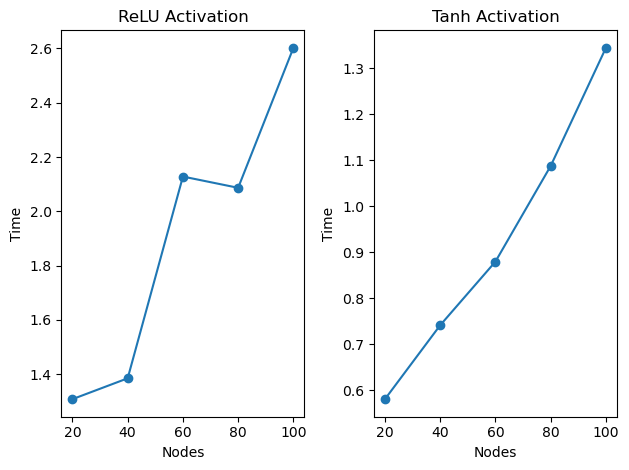

In [8]:
df_time1_relu = df_time1[df_time1['activation'] == 'relu']
df_time1_tanh = df_time1[df_time1['activation'] == 'tanh']

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(df_time1_relu['nodes'], df_time1_relu['time'], marker='o')
plt.title('ReLU Activation')
plt.xlabel('Nodes')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.plot(df_time1_tanh['nodes'], df_time1_tanh['time'], marker='o')
plt.title('Tanh Activation')
plt.xlabel('Nodes')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

In [9]:
#Q1.2
df_time2 = []
for hidden_layers in [1, 2, 3, 4, 5]:
        for nodes in [20]:
            for activation in ["relu", "tanh"]:
                mlp_clf = MLPClassifier(hidden_layer_sizes=[nodes] * hidden_layers, max_iter=1000, activation=activation, random_state=2, solver='lbfgs') # number of hidden layers is passed to the classifier
                print("Hidden_layers:", hidden_layers, "; Nodes:", nodes, "; Activation:", activation)
                time2 = evaluation_with_MinMaxScaler(X_matrix, y, mlp_clf)
                df_time2 +=[hidden_layers, nodes, activation, time2]
                #print(df_time1)
                
reshaped_df_time2 = [df_time2[i:i+4] for i in range(0, len(df_time2), 4)]

df_time2 = pd.DataFrame(reshaped_df_time2, columns=['hidden_layers', 'nodes', 'activation', 'time'])
df_time2

Hidden_layers: 1 ; Nodes: 20 ; Activation: relu
recall    = 0.9018 ±0.0147
precision = 0.9028 ±0.0146
f1        = 0.9018 ±0.0147
Time 0.9068442344665527

Hidden_layers: 1 ; Nodes: 20 ; Activation: tanh
recall    = 0.8982 ±0.0123
precision = 0.8996 ±0.0124
f1        = 0.8983 ±0.0123
Time 0.46680216789245604

Hidden_layers: 2 ; Nodes: 20 ; Activation: relu
recall    = 0.9092 ±0.0085
precision = 0.9100 ±0.0085
f1        = 0.9092 ±0.0084
Time 1.2744379043579102

Hidden_layers: 2 ; Nodes: 20 ; Activation: tanh
recall    = 0.9130 ±0.0102
precision = 0.9141 ±0.0104
f1        = 0.9131 ±0.0102
Time 0.5771031856536866

Hidden_layers: 3 ; Nodes: 20 ; Activation: relu
recall    = 0.9188 ±0.0082
precision = 0.9194 ±0.0080
f1        = 0.9188 ±0.0082
Time 1.569927167892456

Hidden_layers: 3 ; Nodes: 20 ; Activation: tanh
recall    = 0.9163 ±0.0111
precision = 0.9171 ±0.0111
f1        = 0.9163 ±0.0111
Time 0.8280484199523925

Hidden_layers: 4 ; Nodes: 20 ; Activation: relu
recall    = 0.9048 ±0.0110
p

,hidden_layers,nodes,activation,time
0,1,20,relu,0.906844
1,1,20,tanh,0.466802
2,2,20,relu,1.274438
3,2,20,tanh,0.577103
4,3,20,relu,1.569927
5,3,20,tanh,0.828048
6,4,20,relu,2.377049
7,4,20,tanh,1.266640
8,5,20,relu,2.873670
9,5,20,tanh,1.587789


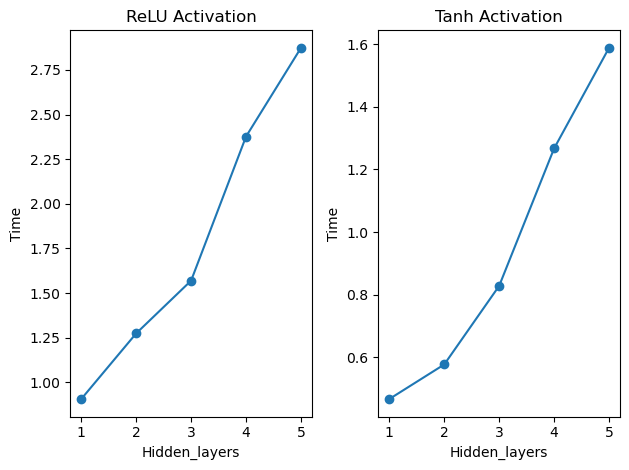

In [10]:
df_time2_relu = df_time2[df_time2['activation'] == 'relu']
df_time2_tanh = df_time2[df_time2['activation'] == 'tanh']

plt.figure()

plt.subplot(1, 2, 1)
plt.plot(df_time2_relu['hidden_layers'], df_time2_relu['time'], marker='o')
plt.title('ReLU Activation')
plt.xlabel('Hidden_layers')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.plot(df_time2_tanh['hidden_layers'], df_time2_tanh['time'], marker='o')
plt.title('Tanh Activation')
plt.xlabel('Hidden_layers')
plt.ylabel('Time')

plt.tight_layout()
plt.show()

In [11]:
#Q4
def evaluation_without_MinMaxScaler(X, y, model):
    kfold = model_selection.KFold(5, shuffle=True, random_state=2)

    prec, rec, f1, Time = [], [], [], []

    for train_idx, test_idx in kfold.split(X_matrix):
        X_train, X_test = X_matrix[train_idx], X_matrix[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        start = time.time()
        mlp_clf.fit(X_train, y_train)
        time_spent = time.time() - start
        #print("Time_spent:", time_spent)

        y_pred = mlp_clf.predict(X_test)

        #print(y_pred)
        #print(y_test)

        rec += [metrics.recall_score(y_pred, y_test, average="weighted")]
        prec += [metrics.precision_score(y_pred, y_test, average="weighted")]
        f1 += [metrics.f1_score(y_pred, y_test, average="weighted")]
        Time += [time_spent]
        #print()
        
    print("recall    = {:.4f} ±{:.4f}".format(np.mean(rec), np.std(rec)))
    print("precision = {:.4f} ±{:.4f}".format(np.mean(prec), np.std(prec)))
    print("f1        = {:.4f} ±{:.4f}".format(np.mean(f1), np.std(f1)))
    print("Time",(np.mean(Time)))
    print()

    return np.mean(Time)

In [12]:
for hidden_layers in [1]:
        for nodes in [20]:
            for activation in ["relu", "tanh"]:
                mlp_clf = MLPClassifier(hidden_layer_sizes=[nodes] * hidden_layers, max_iter=1000, activation=activation, random_state=2, solver='lbfgs') # number of hidden layers is passed to the classifier
                print("Hidden_layers:", hidden_layers, "; Nodes:", nodes, "; Activation:", activation)
                evaluation_without_MinMaxScaler(X_matrix, y, mlp_clf)

Hidden_layers: 1 ; Nodes: 20 ; Activation: relu


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

recall    = 0.7448 ±0.0386
precision = 0.8208 ±0.0139
f1        = 0.7583 ±0.0304
Time 4.539804124832154

Hidden_layers: 1 ; Nodes: 20 ; Activation: tanh


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

recall    = 0.8613 ±0.0119
precision = 0.8634 ±0.0118
f1        = 0.8617 ±0.0118
Time 5.911625146865845



C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
